In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from quantumnetworks import SingleModeSystem, plot_full_evolution, animate_evolution, DoubleModeSystem, MultiModeSystem, plot_evolution_phase_space,plot_full_evolution_phase_space
import numpy as np
import matplotlib.pyplot as plt

# Pulse Drive

In [3]:
def add_line(pos, n, start_point, end_point, N=20):
    start_point = np.array(start_point)
    end_point = np.array(end_point)
    for i in range(0,N):
        pos[n] = np.array(end_point - start_point)*i/N + start_point
        n += 1
    return n

In [4]:
pos = {}
n = 0

# M
print("start ", n)
n = add_line(pos, n, [0,0], [0,20], N=20)
n = add_line(pos, n, [0,20], [10,10], N=20)
n = add_line(pos, n, [10,10], [20,20], N=20)
n = add_line(pos, n, [20,20], [20,0], N=20)
pos[n] = np.array([20,0])
print("end ", n)
n+=1



# I
print("start ", n)
n = add_line(pos, n, [40,0], [40,20], N=20)
pos[n] = np.array([40,20])
print("end ", n)
n+=1

# T
print("start ", n)
n = add_line(pos, n, [60,0], [60,20], N=20)
print("end ", n-1)

print("start ", n)
n = add_line(pos, n, [50,20], [70,20], N=20)
pos[n] = np.array([70,20])
print("end ", n)
n += 1

# pos

start  0
end  80
start  81
end  101
start  102
end  121
start  122
end  142


In [37]:
# coupling matrix

g = 2

q = lambda val : [k for k, v in pos.items() if np.all(v == val)][0]

couplings = []
for i in range(0,80):
    couplings.append([i,i+1, 2*np.pi*g])
    
for i in range(81,101):
    couplings.append([i,i+1, 2*np.pi*g])
    
for i in range(102,121):
    couplings.append([i,i+1, 2*np.pi*g])
    
for i in range(122,142):
    couplings.append([i,i+1, 2*np.pi*g])

couplings.append([q(np.array([60,19])),q(np.array([60,20])), 2*np.pi*g])
couplings.append([q(np.array([20,10])),q(np.array([40,10])), 2*np.pi*g])
couplings.append([q(np.array([40,10])),q(np.array([60,10])), 2*np.pi*g])

In [38]:
# N modes

gaussian_drive_gen = lambda amp, a, w, t0, t: amp*np.exp(1j*w*t) * np.exp(-a*(t-t0)**2) # gaussian envelope + carrier frequency centered at time t0

wd = 1
a = 5
t0 = 10
amp = 100

N = n
wr = 1
omegas = [2*np.pi*wr]*N
kappas = [0]*N
kappas[0] = 2*np.pi*0.1
kappas[81] = 2*np.pi*0.1
kappas[102] = 2*np.pi*0.1
gammas = np.zeros(N)
kerrs = np.zeros(N)
couplings = couplings

# for i in range(N-1):
#     couplings.append([i,i+1,2*np.pi*g])

drive = lambda t: gaussian_drive_gen(amp, a, 2*np.pi*(wd), t0, t)
drives = {0: drive, 81: drive, 102: drive}

sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs":kerrs, "drives":drives, "couplings":couplings})

x_0 = np.array([0,0]*N)
ts = np.linspace(0, 30, 10001)

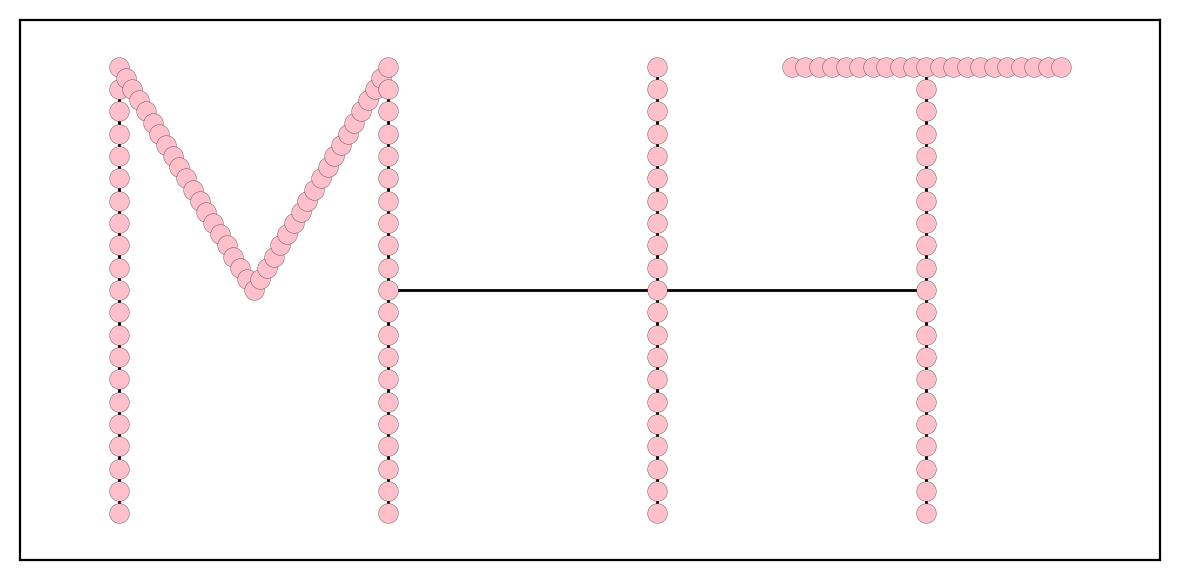

In [57]:
fig, ax = plt.subplots(1, figsize=(6, 3), dpi=200)
_ = sys.draw_network(ax=ax, pos=pos, with_edge_labels=False, with_node_labels=False, node_size=50, width=1, linewidths=.1)

In [40]:
X = sys.trapezoidal(x_0, ts)

In [65]:
a = np.array([[1,2,4],[-1,2,6],[6,1,0]])
print(a)
print(np.max(a, axis=0))
print(np.min(a, axis=0))

[[ 1  2  4]
 [-1  2  6]
 [ 6  1  0]]
[6 2 6]
[-1  1  0]


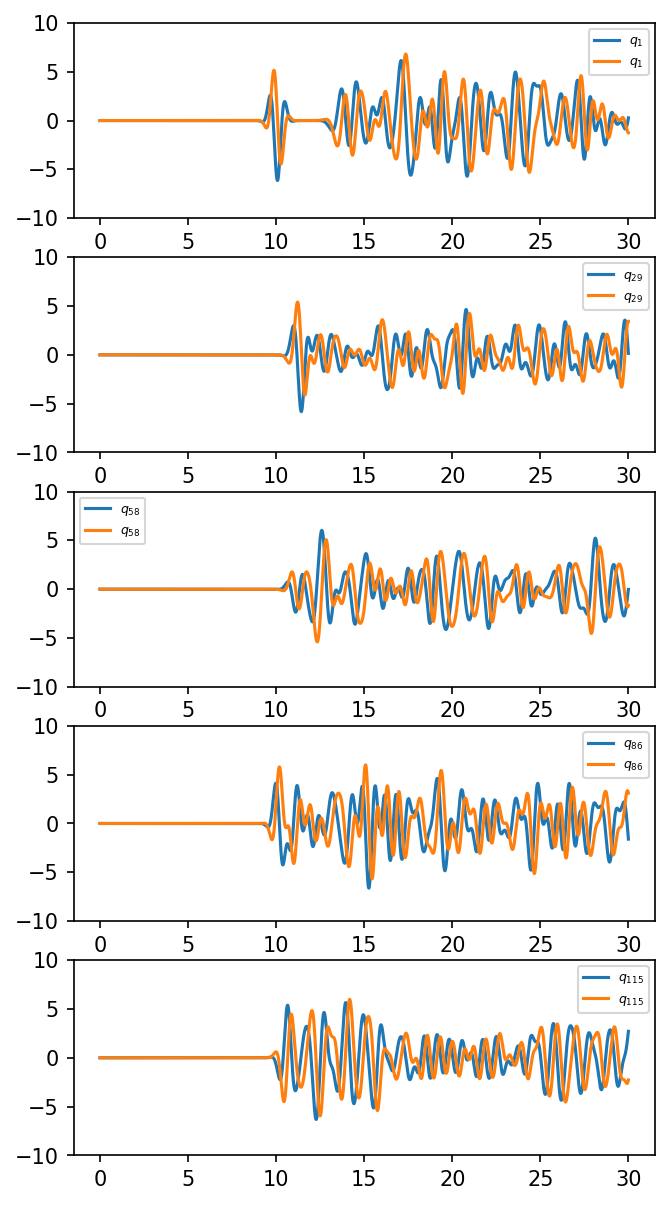

In [41]:
num_plots = 5
fig, axs = plt.subplots(num_plots,1, figsize=(5,2*num_plots), dpi=150)

ylim = np.array([-0.1,0.1])*amp

for j in range(0,num_plots):
    i = j*N//num_plots
    ax = axs[j]
    labels = ["$q_{" + str(i+1) + "}$","$p_{" + str(i+1) + "}$"]
    # plot_full_evolution(X[2*i:2*(i+1)], ts, fig=fig, ax=ax, labels=labels)
    ax.plot(ts, X[2*i,:], label=labels[0])
    ax.plot(ts, X[2*i+1,:], label=labels[0])
    # ax.plot(ts, X[2*i:2*(i+1),:], fig=fig, ax=ax, labels=labels)
    ax.legend(fontsize=6)
    # ax.set_title(None)
    ax.set_xlabel(None)
    ax.set_ylim(*ylim)

In [59]:
fig, ax = plt.subplots(1, figsize=(6, 3), dpi=200)
sys.animate_networkx(X, ts, ax=ax, pos=pos, animation_time=5, num_frames=54, with_edge_labels=False, with_node_labels=False, save_animation="mit.gif", node_size=50, width=1, linewidths=.1)

(<Figure size 1200x600 with 1 Axes>,
 <AxesSubplot:title={'center':'t = 29.45 ns'}>)